# LINEAR REGRESSION - CAR PRICE CASE STUDY

### Importing and Understanding Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing CarPrice_Assignment.csv
carprice = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Checking for Null values
carprice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Visualizing Data

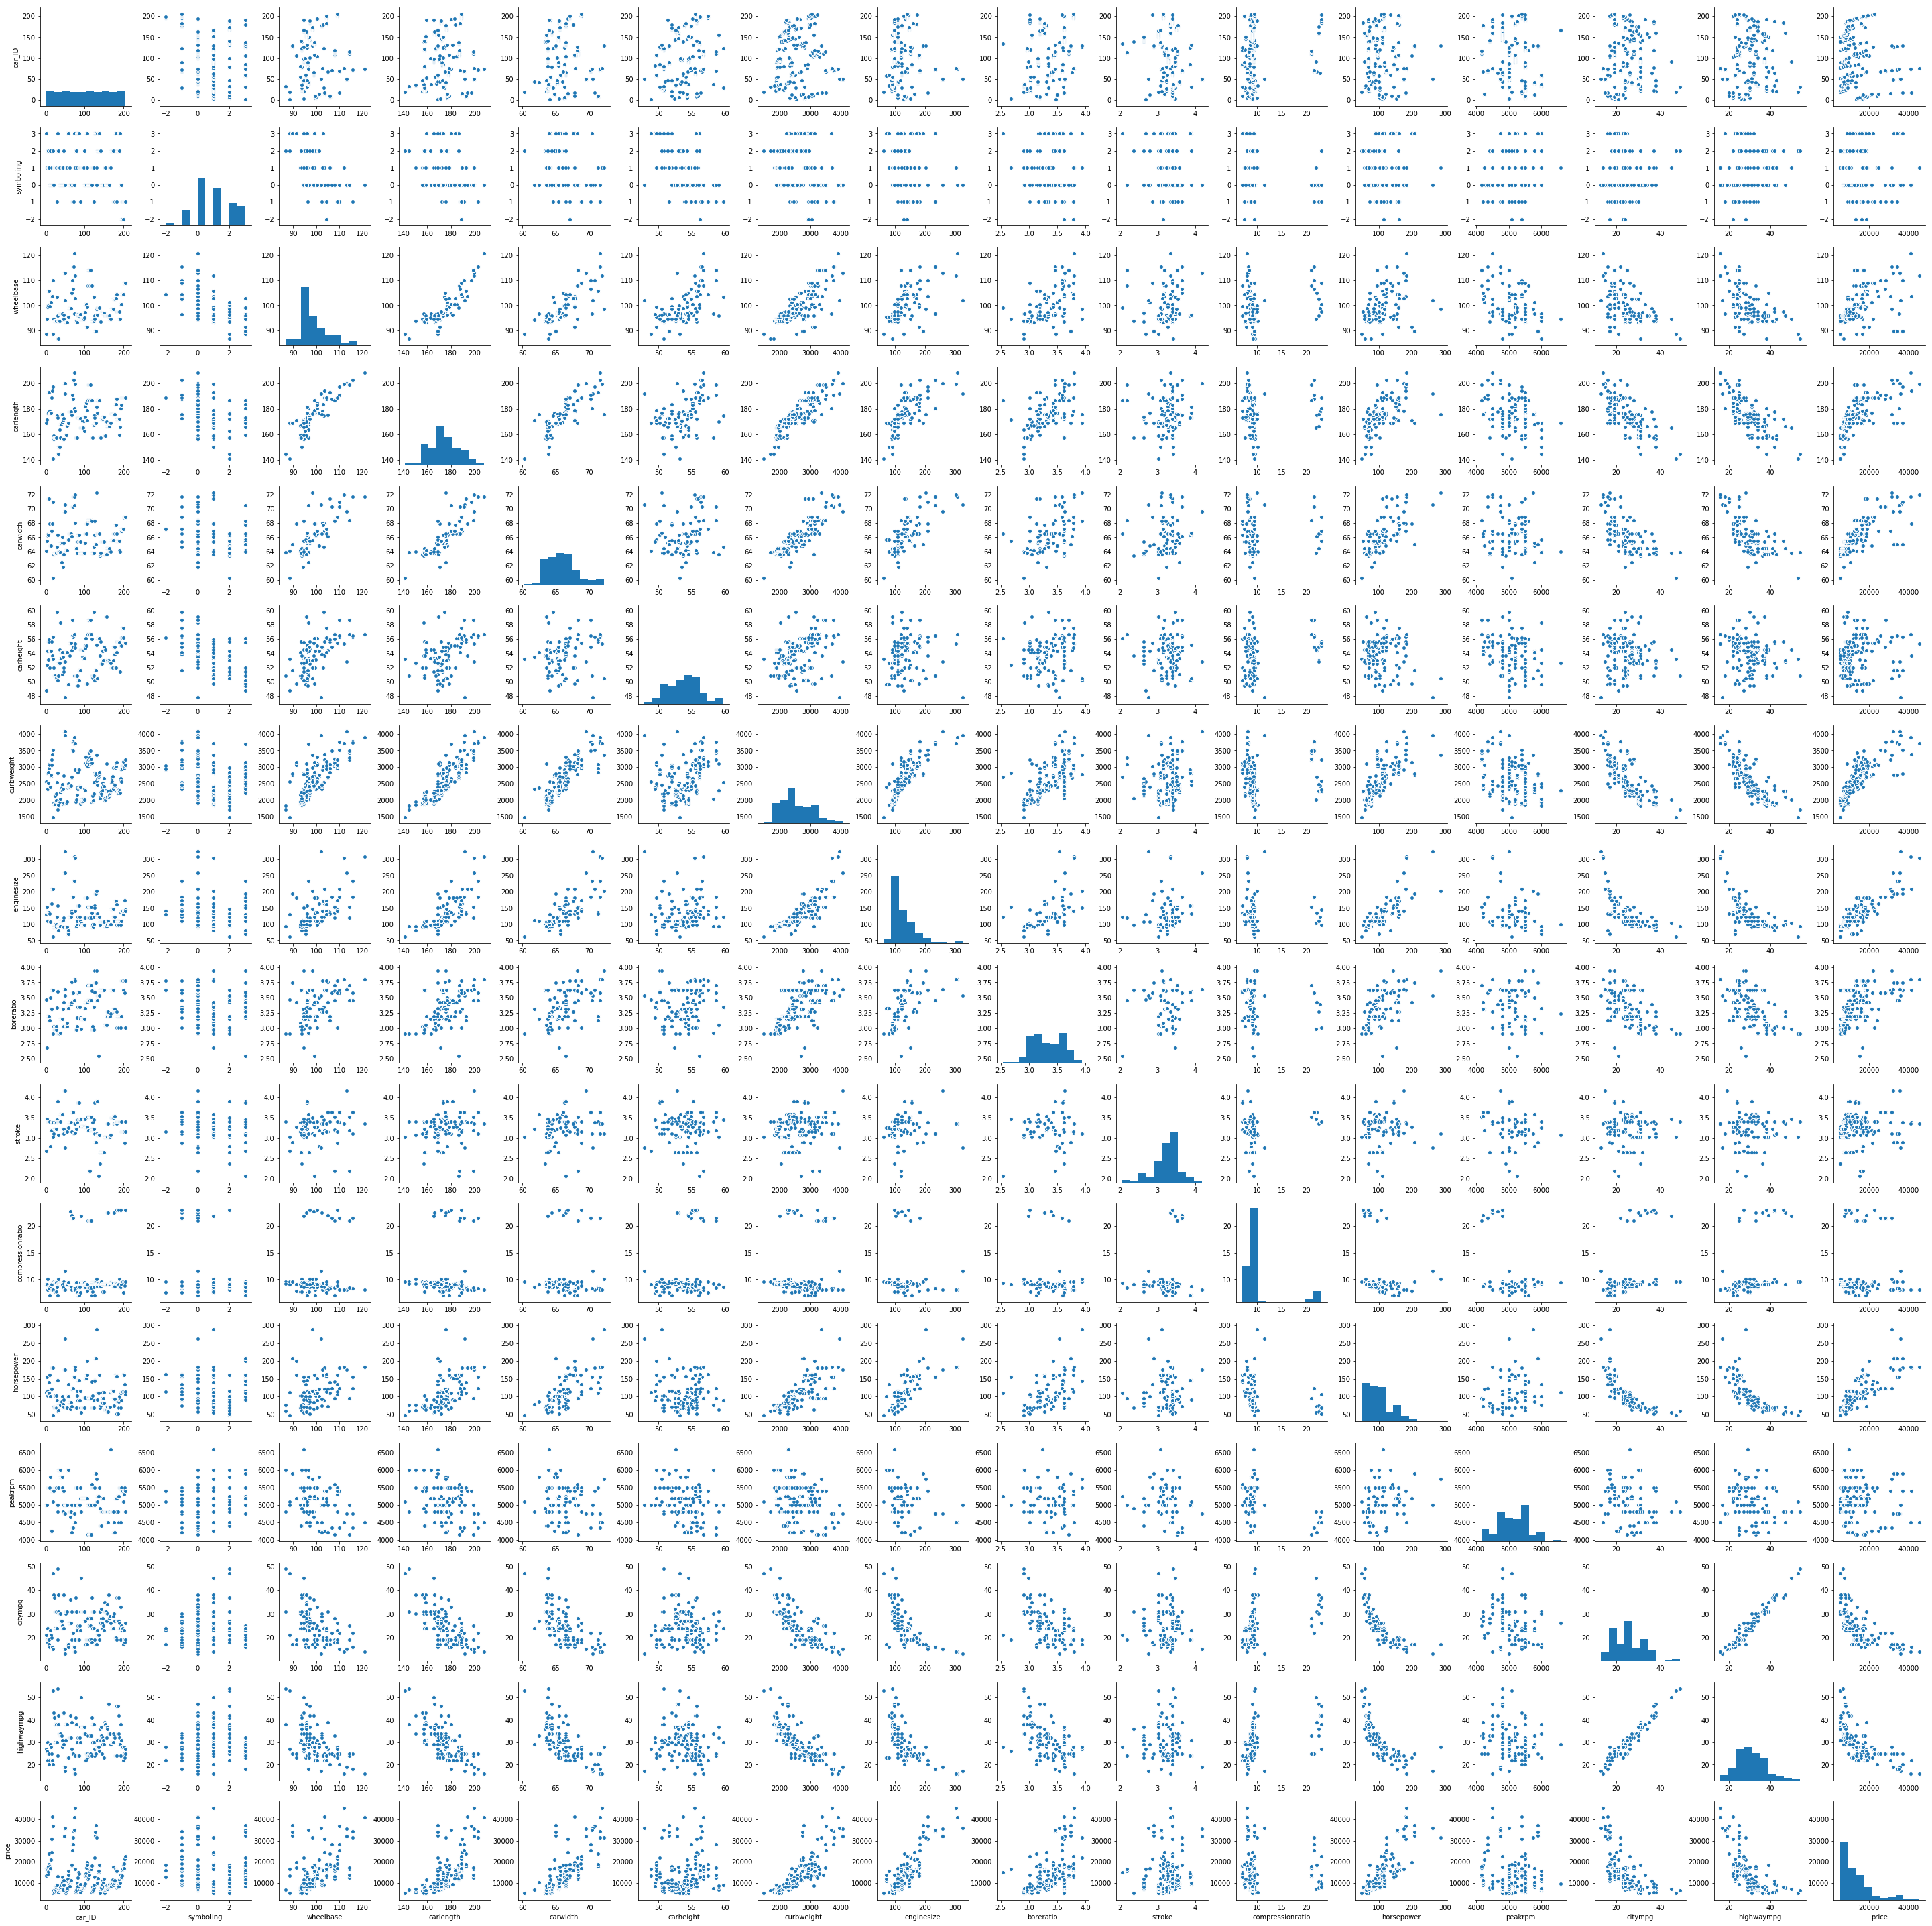

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(carprice)

#### Ploting numerical variables vs price to see their tread

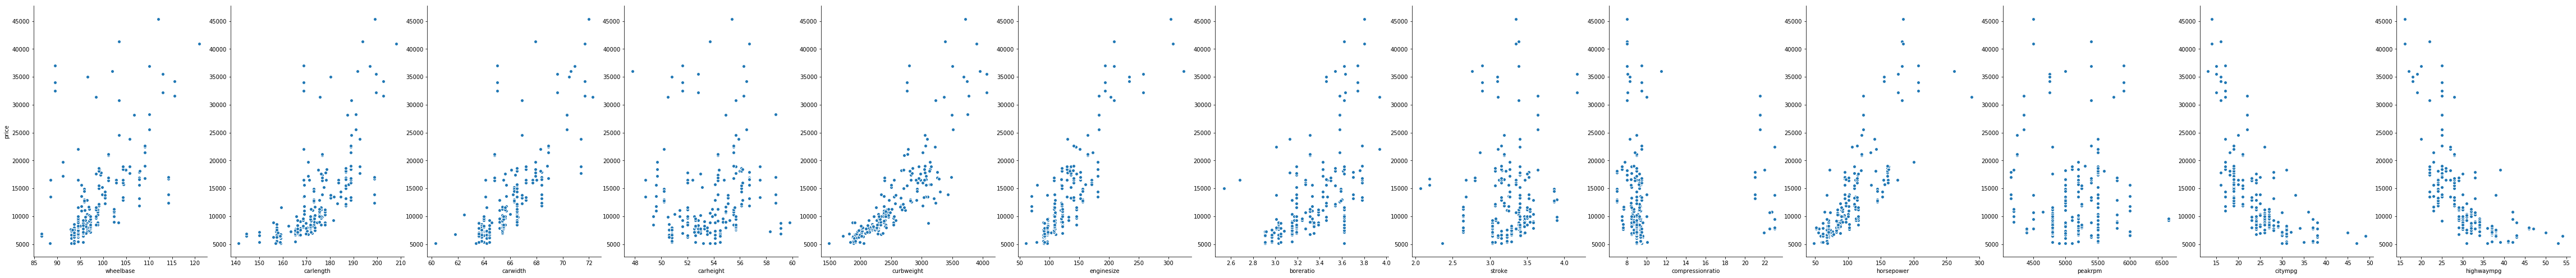

In [9]:
numerical_variables = ['wheelbase','carlength','carwidth', 'carheight','curbweight',\
                                        'enginesize','boreratio','stroke','compressionratio','horsepower',\
                                       'peakrpm','citympg','highwaympg']
sns.pairplot(carprice, x_vars=numerical_variables, y_vars='price',size=7, aspect=0.7, kind='scatter')

#### Finding correlation between vairables

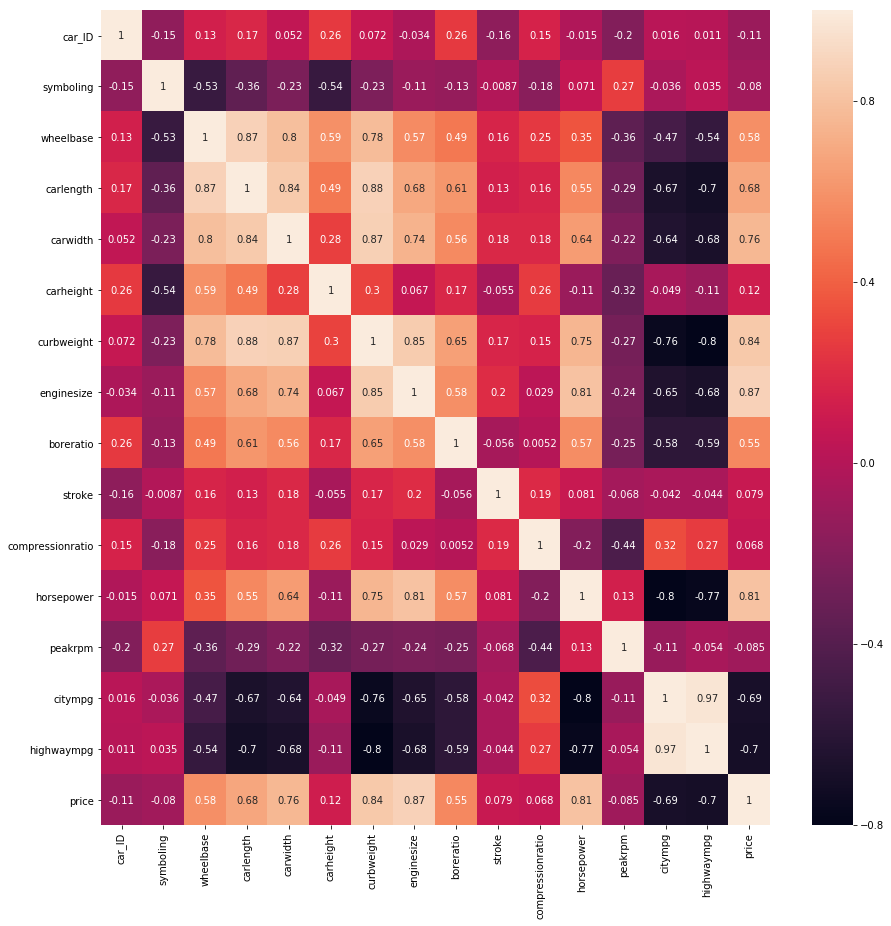

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(carprice.corr(),annot = True)

From above charts it is clear that ```price``` is highly positive correlated with ```enginesize```, ```curbweight```, ```carwidth``` and ```carlength```. Also it is highly negative correlated with  ```citympg``` and ```highwaympg``` 

### Handling categorical variable

In [11]:
# Creating  CarCompany from CarName
carprice['CarCompany'] = carprice['CarName'].apply(lambda x: x.split(' ')[0].lower())
carprice['CarCompany'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarCompany, dtype: object

#### Cleaning the ```drivewheel``` column

In [12]:
carprice['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### We see following spelling errors
- ```maxda```, ```mazda```
- ```porsche```, ```porcshce```
- ```toyota```, ```toyouta```
- ```vokswagen```, ```volkswagen```, ```vw```

In [13]:
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('maxda', 'mazda'))
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('porcshce', 'porsche'))
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('toyouta', 'toyota'))
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('vokswagen', 'volkswagen'))
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('vw', 'volkswagen'))
carprice['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### ```drivewheel``` has spelling mistake. `4wd` should be `fwd`. 

In [14]:
carprice['drivewheel'] = carprice['drivewheel'].apply(lambda c : c if pd.isnull(c) else c.replace('4', 'f'))
carprice['drivewheel'].head()

0    rwd
1    rwd
2    rwd
3    fwd
4    fwd
Name: drivewheel, dtype: object

#### Converting ```symboling``` to a categorical variable

In [15]:
carprice.symboling = pd.Categorical(carprice.symboling)

In [16]:
carprice.describe(include=['O'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompany
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,2,2,7,7,8,22
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,6,185,168,115,96,129,202,148,159,94,32


#### Diplaying all the unique values of the categorical variables

In [17]:
def printCategoricalVal(colName):
    print('%s values :-' % colName)
    print(carprice[colName].unique())
    print('\n')
    
categorical_variables = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel', \
 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']

[ printCategoricalVal(item) for item in categorical_variables]

symboling values :-
[3, 1, 2, 0, -1, -2]
Categories (6, int64): [3, 1, 2, 0, -1, -2]


fueltype values :-
['gas' 'diesel']


aspiration values :-
['std' 'turbo']


doornumber values :-
['two' 'four']


carbody values :-
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drivewheel values :-
['rwd' 'fwd']


enginelocation values :-
['front' 'rear']


enginetype values :-
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


cylindernumber values :-
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


fuelsystem values :-
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


CarCompany values :-
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']




[None, None, None, None, None, None, None, None, None, None, None]

#### Getting Dummy variables of all catergorical values

In [18]:
categorical_df = pd.get_dummies(carprice.loc[:,categorical_variables], prefix=categorical_variables, drop_first=True)
categorical_df.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Adding the results to the ```carprice_master`` dataframe

In [19]:
carprice_master = pd.concat([carprice.loc[:, numerical_variables], categorical_df, carprice.loc[:, 'price']],axis=1)
carprice_master.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,17450.0


### Rescaling the Features 

In [20]:
carprice_master.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dod

In [21]:
#UDFf fot min-max scaling (Normalization)
def minMaxScaler (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

In [22]:
carprice_master = carprice_master.apply(minMaxScaler)
carprice_master.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207959
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282558
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282558
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219254
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306142


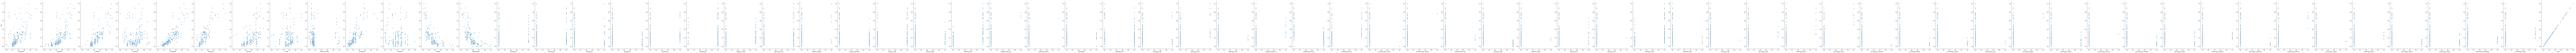

In [23]:
sns.pairplot(carprice_master, x_vars=carprice_master.columns, y_vars='price',size=7, aspect=0.7, kind='scatter')

### Splitting data into training and testing sets

In [24]:
# Putting feature variable to X
X = carprice_master[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarCompany_mazda', 'CarCompany_mercury',
       'CarCompany_mitsubishi', 'CarCompany_nissan', 'CarCompany_peugeot',
       'CarCompany_plymouth', 'CarCompany_porsche', 'CarCompany_renault',
       'CarCompany_saab', 'CarCompany_subaru', 'CarCompany_toyota',
       'CarCompany_volkswagen', 'CarCompany_volvo']]

# Putting response variable to y
y = carprice_master['price']

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [26]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### Building model using sklearn

In [27]:
# Importing RFE and LinearRegression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [28]:
lm = LinearRegression()

In [29]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model with all variables
print(lm.summary())   # Summary of the output

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     54.82
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.36e-47
Time:                        15:50:56   Log-Likelihood:                 297.96
No. Observations:                 143   AIC:                            -473.9
Df Residuals:                      82   BIC:                            -293.2
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheelbase                 0.18

In [30]:
vif_cal(input_data=carprice_master, dependent_col="price")

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
30,enginetype_ohcf,inf
38,cylindernumber_two,inf
26,enginelocation_rear,inf
63,CarCompany_subaru,inf
36,cylindernumber_three,inf
28,enginetype_l,inf
58,CarCompany_peugeot,inf
32,enginetype_rotor,inf
18,fueltype_gas,1197.360000
41,fuelsystem_idi,462.460000


### We see that lot many variables have p-value way over 0.05 that means for these values we can reject the null hypothesis i.e these variables are insignificant
### Running RFE with the output number of the variable equal to 20 (because Total number of variables is way too large)

In [31]:
rfe = RFE(LinearRegression(), 20)           
rfe = rfe.fit(X_train, y_train)
print(rfe.support_) 
print(rfe.ranking_)  

[ True False  True False  True  True  True  True False False  True False
 False False False False False False False  True False False False False
 False False  True False  True False False False  True  True  True False
  True  True  True False False False False False False False False  True
 False False False False False False False False  True False  True False
  True False False False False False False]
[ 1  9  1  5  1  1  1  1 14  3  1 24 15 26 36 38 37 39 13  1 41 20 19 21 22
 28  1  2  1 43 11 35  1  1  1 17  1  1  1 23 27 18 47 44 45 46 25  1 33 12
  7 10 34 16 29 48  1 31  1  6  1 42  4 40 32 30  8]


In [32]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'aspiration_turbo', 'enginelocation_rear',
       'enginetype_l', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CarCompany_bmw', 'CarCompany_mitsubishi',
       'CarCompany_peugeot', 'CarCompany_porsche'],
      dtype='object')

In [33]:
# UDF to get the linear model summary of the selected variables
#  col: takes list/array of column name
def getSummary(col):
    # Creating X_train_rfe dataframe with selected variables
    X_train_rfe = X_train[col]
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    print(lm.summary())
    return lm

In [34]:
# UDF to get the VIF of selected variables
#  colmns: takes list/array of column name
def getVIF(colmns):
    colmns.append('price')
    return vif_cal(input_data=carprice_master.loc[:,colmns], dependent_col="price")

In [35]:
# UDF to get the list of selected list of columns after droping columns
#  col: Series of column names
#  drop_cols: columns to drop
def getColumnList(col, drop_cols=[]):
    colmns = col.drop(labels=drop_cols)
    colmns = colmns.tolist()
    return colmns

### Training the model for the first time with all columns

In [36]:
lr_model = getSummary(col)
getVIF(getColumnList(col))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     143.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.90e-74
Time:                        15:50:58   Log-Likelihood:                 252.75
No. Observations:                 143   AIC:                            -467.5
Df Residuals:                     124   BIC:                            -411.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
10,enginetype_rotor,inf
9,enginetype_l,inf
18,CarCompany_peugeot,inf
15,cylindernumber_two,inf
13,cylindernumber_three,inf
2,curbweight,61.130000
1,carwidth,54.930000
3,enginesize,52.040000
4,boreratio,35.100000
0,wheelbase,26.380000


### Dropping ```wheelbase``` Variable as it has p-value greate than 0.05 and Updating the Model

In [37]:
new_columns= getColumnList(col, drop_cols=['wheelbase'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     150.2
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.59e-74
Time:                        15:50:59   Log-Likelihood:                 251.34
No. Observations:                 143   AIC:                            -466.7
Df Residuals:                     125   BIC:                            -413.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
9,enginetype_rotor,inf
8,enginetype_l,inf
17,CarCompany_peugeot,inf
14,cylindernumber_two,inf
12,cylindernumber_three,inf
1,curbweight,56.160000
2,enginesize,51.820000
0,carwidth,43.170000
3,boreratio,35.080000
11,cylindernumber_four,22.720000


### As we can see all  variable have p-value < 0.05. So we look for correlation using VIF. We find that many variables have VIF greater than 2
### Dropping ```enginetype_rotor``` Variable and Updating the Model

In [38]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     150.2
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.59e-74
Time:                        15:50:59   Log-Likelihood:                 251.34
No. Observations:                 143   AIC:                            -466.7
Df Residuals:                     125   BIC:                            -413.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
16,CarCompany_peugeot,inf
11,cylindernumber_three,inf
8,enginetype_l,inf
1,curbweight,56.160000
2,enginesize,51.820000
0,carwidth,43.170000
3,boreratio,35.080000
10,cylindernumber_four,22.720000
4,stroke,21.850000
5,peakrpm,6.190000


### Dropping ```CarCompany_peugeot``` Variable as it has very high VIF and Updating the Model

In [39]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     150.2
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.59e-74
Time:                        15:50:59   Log-Likelihood:                 251.34
No. Observations:                 143   AIC:                            -466.7
Df Residuals:                     125   BIC:                            -413.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

,Var,Vif
1,curbweight,56.16
2,enginesize,51.82
0,carwidth,43.17
3,boreratio,35.08
10,cylindernumber_four,22.72
4,stroke,21.85
5,peakrpm,6.19
16,CarCompany_porsche,3.06
7,enginelocation_rear,2.98
13,cylindernumber_two,2.63


### Dropping ```curbweight``` Variable as it has very high VIF and Updating the Model

In [40]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     145.1
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.72e-73
Time:                        15:51:00   Log-Likelihood:                 244.34
No. Observations:                 143   AIC:                            -454.7
Df Residuals:                     126   BIC:                            -404.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

,Var,Vif
1,enginesize,40.89
0,carwidth,35.53
2,boreratio,32.92
9,cylindernumber_four,22.45
3,stroke,21.84
4,peakrpm,6.09
6,enginelocation_rear,2.98
15,CarCompany_porsche,2.96
12,cylindernumber_two,2.60
8,cylindernumber_five,2.47


## Making Predictions

In [41]:
# UDF to make predictions
# lm: takes the linear model
# col: list of columns name which is used of prediction
def makePredictions(lm, col):
    if 'price' in col: col.remove('price')
    X_test_col = X_test[col] 
    X_test_col = sm.add_constant(X_test_col)
    y_pred = lm.predict(X_test_col)
    return y_pred

## Model Evaluation

In [42]:
# UDF to evaluate the model
# y_pred: takes the predicted price values
def evaluateModel(y_pred):
    c = [i for i in range(1,y_pred.size+1,1)] # generating index 
    # Actual versus predict value
    fig = plt.figure()
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") 
    fig.suptitle('Actual and Predicted', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Car Price', fontsize=16)                           
    
    # Error on each prediction
    fig = plt.figure()
    plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
    fig.suptitle('Error Terms', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                    
    plt.ylabel('ytest-ypred', fontsize=16)               
    
    # y_test vs y_pred
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)               
    plt.xlabel('y_test', fontsize=18)                         
    plt.ylabel('y_pred', fontsize=16)                         
    
    # Distribution of each error
    fig = plt.figure()
    sns.distplot((y_test-y_pred),bins=50)
    fig.suptitle('Error Terms', fontsize=20)                  
    plt.xlabel('y_test-y_pred', fontsize=18)                 
    plt.ylabel('Index', fontsize=16)                          
    
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

## Making prediction with current model

RMSE : 0.0775020350427


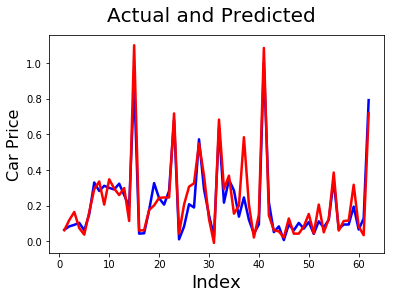

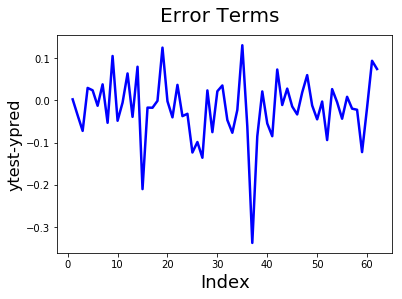

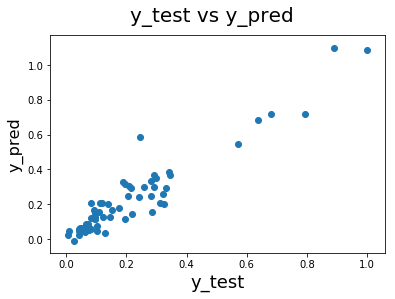

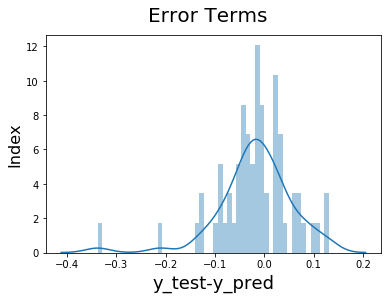

In [43]:
y_pred = makePredictions(lr_model, new_columns)
evaluateModel(y_pred)

## But still there are many columns with VIF greater than 2.
### Dropping ```boreratio``` Variable as it has very high VIF and Updating the Model
#### We are not dropping ```enginesize``` because we have seen earlier that ```enginesize``` has a strong correlation with ```price```

In [44]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     106.9
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.33e-64
Time:                        15:51:02   Log-Likelihood:                 218.98
No. Observations:                 143   AIC:                            -406.0
Df Residuals:                     127   BIC:                            -358.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

,Var,Vif
0,carwidth,35.03
1,enginesize,24.43
2,stroke,18.05
8,cylindernumber_four,9.97
3,peakrpm,6.00
5,enginelocation_rear,2.98
14,CarCompany_porsche,2.82
7,cylindernumber_five,2.30
11,cylindernumber_two,1.76
4,aspiration_turbo,1.59


### Dropping ```carwidth``` Variable as it has very high VIF and Updating the Model

In [45]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.55
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.47e-60
Time:                        15:51:03   Log-Likelihood:                 205.18
No. Observations:                 143   AIC:                            -380.4
Df Residuals:                     128   BIC:                            -335.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

,Var,Vif
1,stroke,18.01
7,cylindernumber_four,7.77
0,enginesize,7.30
2,peakrpm,5.69
13,CarCompany_porsche,2.69
4,enginelocation_rear,2.54
6,cylindernumber_five,1.56
3,aspiration_turbo,1.54
10,cylindernumber_two,1.45
5,enginetype_l,1.36


### Dropping ```enginetype_l``` because p-value is over 0.05 and Updating the Model

In [46]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.87e-61
Time:                        15:51:03   Log-Likelihood:                 205.05
No. Observations:                 143   AIC:                            -382.1
Df Residuals:                     129   BIC:                            -340.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

,Var,Vif
1,stroke,17.55
6,cylindernumber_four,7.19
0,enginesize,6.98
2,peakrpm,5.54
12,CarCompany_porsche,2.69
4,enginelocation_rear,2.54
5,cylindernumber_five,1.56
3,aspiration_turbo,1.47
9,cylindernumber_two,1.42
8,cylindernumber_twelve,1.27


### Dropping ```enginelocation_rear``` because p-value is over 0.05 and Updating the Model

In [47]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.33e-61
Time:                        15:51:03   Log-Likelihood:                 203.86
No. Observations:                 143   AIC:                            -381.7
Df Residuals:                     130   BIC:                            -343.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

,Var,Vif
1,stroke,17.54
5,cylindernumber_four,7.15
0,enginesize,6.97
2,peakrpm,5.48
4,cylindernumber_five,1.56
3,aspiration_turbo,1.47
8,cylindernumber_two,1.42
11,CarCompany_porsche,1.31
7,cylindernumber_twelve,1.27
10,CarCompany_mitsubishi,1.18


### Dropping ```stroke``` because VIF is very high and Updating the Model

In [48]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear', 'stroke'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.32e-61
Time:                        15:51:04   Log-Likelihood:                 199.32
No. Observations:                 143   AIC:                            -374.6
Df Residuals:                     131   BIC:                            -339.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

,Var,Vif
1,peakrpm,5.09
4,cylindernumber_four,4.01
0,enginesize,2.84
2,aspiration_turbo,1.47
3,cylindernumber_five,1.38
7,cylindernumber_two,1.28
10,CarCompany_porsche,1.25
8,CarCompany_bmw,1.17
9,CarCompany_mitsubishi,1.15
6,cylindernumber_twelve,1.14


### Dropping ```cylindernumber_four``` because p-value is over 0.05 and Updating the Model

In [49]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear', 'stroke','cylindernumber_four'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.37e-61
Time:                        15:51:04   Log-Likelihood:                 197.90
No. Observations:                 143   AIC:                            -373.8
Df Residuals:                     132   BIC:                            -341.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

,Var,Vif
0,enginesize,2.80
1,peakrpm,2.39
2,aspiration_turbo,1.38
3,cylindernumber_five,1.15
8,CarCompany_mitsubishi,1.15
5,cylindernumber_twelve,1.12
6,cylindernumber_two,1.12
7,CarCompany_bmw,1.12
9,CarCompany_porsche,1.11
4,cylindernumber_three,1.01


In [50]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear', 'stroke','cylindernumber_four',
                                          'cylindernumber_three'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.83e-62
Time:                        15:51:04   Log-Likelihood:                 196.73
No. Observations:                 143   AIC:                            -373.5
Df Residuals:                     133   BIC:                            -343.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

,Var,Vif
0,enginesize,2.79
1,peakrpm,2.37
2,aspiration_turbo,1.38
3,cylindernumber_five,1.15
7,CarCompany_mitsubishi,1.15
4,cylindernumber_twelve,1.12
5,cylindernumber_two,1.12
6,CarCompany_bmw,1.12
8,CarCompany_porsche,1.11


### Dropping ```peakrpm``` because p-value is over 0.05 and Updating the Model
#### Again, we are not dropping ```enginesize``` because we have seen earlier that ```enginesize``` has a strong correlation with ```price```

In [51]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear', 'stroke','cylindernumber_four',
                                          'cylindernumber_three', 'peakrpm'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     144.5
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.12e-62
Time:                        15:51:04   Log-Likelihood:                 194.14
No. Observations:                 143   AIC:                            -370.3
Df Residuals:                     134   BIC:                            -343.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

,Var,Vif
0,enginesize,1.65
1,aspiration_turbo,1.38
2,cylindernumber_five,1.15
5,CarCompany_bmw,1.12
7,CarCompany_porsche,1.11
6,CarCompany_mitsubishi,1.10
3,cylindernumber_twelve,1.09
4,cylindernumber_two,1.00


## Now we see that p-value of every variable has fallen below 0.05 and VIF is also below 2 each of them. Also the Adjusted r square is sufficient high and close to R square. Therefore evaluating the current model

RMSE : 0.0767524232757


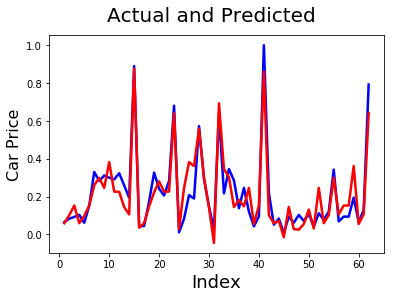

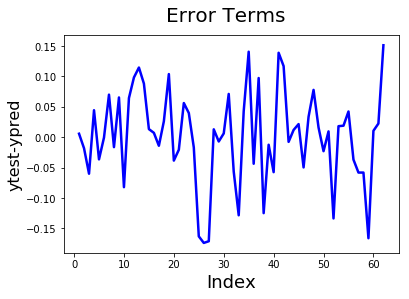

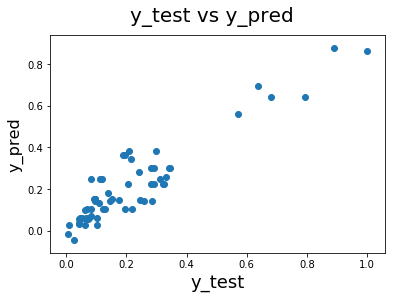

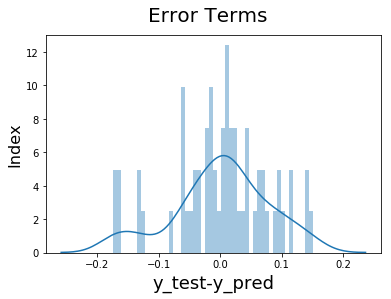

In [52]:
y_pred = makePredictions(lr_model, new_columns)
evaluateModel(y_pred)